# Machine learnng clustering and predicting

## Importing libraries

In [6]:
import pandas as pd #dataframe
import numpy as np #dataframe
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import seaborn as sns


# Loading the data
Here we load the data with the same format as in [analysis.ipynb](analisys)

In [127]:
data_original = pd.read_csv('site_data_zap.csv',sep='\t')
print(data_original.shape)
data = data_original.drop_duplicates()
data = data.drop(columns=['link'])
data = data.fillna(0)
data.insert(3,'total',data['rent'] + data['condominium'] + data['iptu'])
print(data.shape)
df = data.loc[(data['area'] >= 5) & (data['area'] <= 250)]
print(df.shape)
df = df.loc[(data['room'] >= 1) & (data['bathroom'] >= 1) & (data['car_space'] <= 5)]
print(df.shape)
df = df.loc[(data['total'] <= 3000)]
print(df.shape)
df.head()

(11306, 10)
(6029, 10)
(4626, 10)
(2963, 10)
(2070, 10)


rent  condominium   iptu   total  \
0   1100        670.0    0.0  1770.0   
4   1300          0.0    0.0  1300.0   
6   1900          0.0  170.0  2070.0   
8   1800        440.0  150.0  2390.0   
10  1490        605.0   95.0  2190.0   

                                               adress   area  room  car_space  \
0           Rua Thomas Alva Edison, Jardim Bela Vista   45.0   2.0        1.0   
4   Rua Herminio Camargo Souza, Dic V Conjunto Hab...   99.0   3.0        1.0   
6         Rua Jacob Bereck Steinberg, Jardim Chapadão  130.0   3.0        3.0   
8                       Rua Martinho Calsavara, Swift   78.0   3.0        1.0   
10                       Vila Andrade Neves, Campinas   65.0   2.0        2.0   

    bathroom                                        description  
0        2.0  Apartamento residencial para LocaçãoÓtimo apar...  
4        2.0  Casa para locação no DIC 5, com 03 dormitórios...  
6        2.0  Ótima localização, no bairro Jardim Chapadão, ...  
8        2.0  Apartamento para locação Perfect LIfe .Localiz...  
10       2.0  Apartamento mobiliado para alugar 2 dormitório...

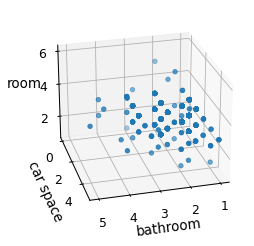

In [189]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df.bathroom, df.car_space, df.room)

ax.set_xlabel('bathroom')
ax.set_ylabel('car space')
ax.set_zlabel('room')
ax.view_init(25,75)

In [190]:
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

def update(i, fig, ax):
    ax.view_init(elev=20., azim=i)
    return fig, ax
 
anim = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), repeat=True, fargs=(fig, ax))
anim.save('rgb_cube.gif', dpi=80, writer='imagemagick', fps=12)

MovieWriter imagemagick unavailable; using Pillow instead.


## Regression
We try some linear regression. 
First dividing the data into training and test data.

In [138]:
train = round(4*len(df.area)/5)
test = round(1*len(df.area)/5)

x_train = df[['area'][0:train]]
x_test = df[['area'][0:test]]
y_train = df[['total'][0:train]]
y_test = df[['total'][0:test]]

Coefficients: [[8.48896698]]
Mean squared error: 271229.51
Coefficient of determination: 0.20


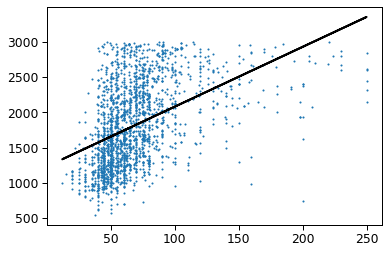

In [170]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regr = sklearn.linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print('Coefficients:', regr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

plt.scatter(x_test, y_test, s=1.5)
plt.plot(x_test, y_pred, color='black', linewidth=2)

plt.show()

## Clustering
### Tentative 1 - kmeans
We try some k-means method of clustering. The result is kinda irrelevant since its divided horizontally by total price and doesn't give any meaningfull insight.

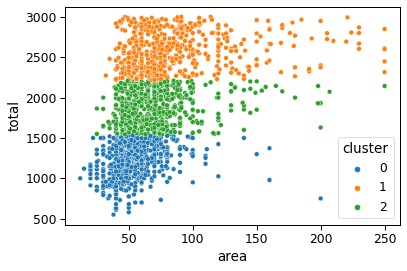

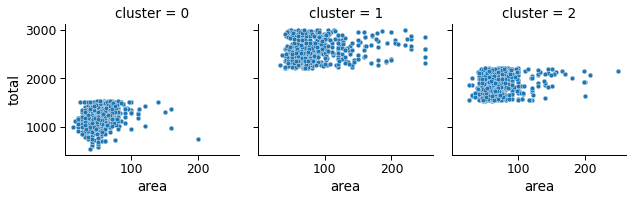

In [117]:
clustering = KMeans(n_clusters=3)
y_predicted = clustering.fit_predict(df[['area','total','room','bathroom','car_space']])

# df.insert(6,'cluster',y_predicted)

df['cluster'] = y_predicted
sns.scatterplot(x='area', y='total', data=df, hue='cluster',palette='tab10')

g = sns.FacetGrid(df, col='cluster')
g.map(sns.scatterplot,'area','total', palette='tab10')

We then try to remove the area and total variables trying to cluster by the secondary variables, giving a more relevant relation.

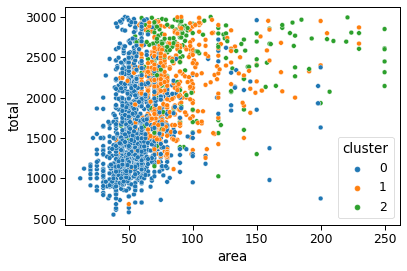

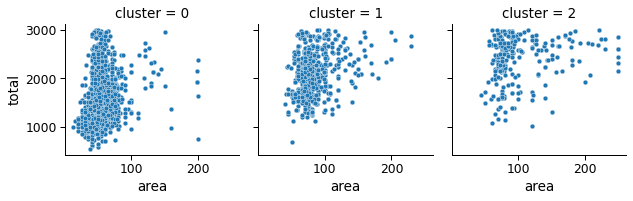

In [109]:
clustering = KMeans(n_clusters=3)
y_predicted = clustering.fit_predict(df[['room','bathroom','car_space']])

df['cluster'] = y_predicted

# sns.set_context('paper', font_scale=1.4)
sns.scatterplot(x='area', y='total', data=df, palette='tab10', hue='cluster')

g = sns.FacetGrid(df, col='cluster')
g.map(sns.scatterplot,'area','total', palette='tab10')


## Tentative 2 - Other methods
We try different methods, less general than kmeans and see the results.

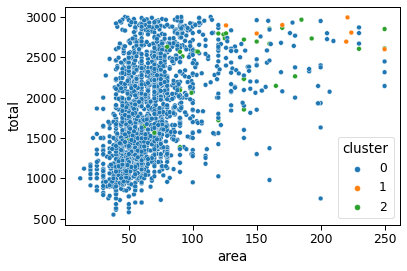

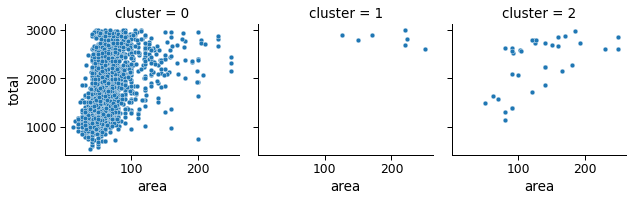

In [110]:
clustering = sklearn.cluster.Birch(n_clusters=3)
y_spectral = clustering.fit_predict(df[['bathroom','car_space','room']])
df['cluster'] = y_spectral
sns.scatterplot(x='area', y='total', data=df, hue='cluster',palette='tab10')
g = sns.FacetGrid(df, col='cluster')
g.map(sns.scatterplot,'area','total', palette='tab10')

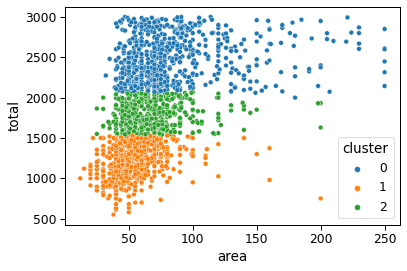

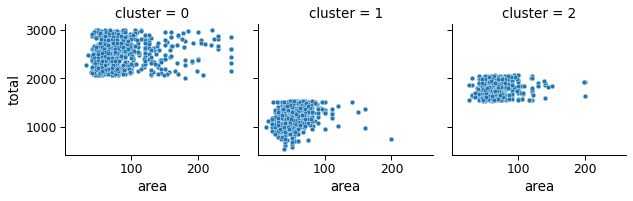

In [111]:
clustering = sklearn.cluster.AgglomerativeClustering(n_clusters=3)
y_spectral = clustering.fit_predict(df[['bathroom','car_space','room','total','area']])
df['cluster'] = y_spectral
sns.scatterplot(x='area', y='total', data=df, hue='cluster',palette='tab10')

g = sns.FacetGrid(df, col='cluster')
g.map(sns.scatterplot,'area','total', palette='tab10')

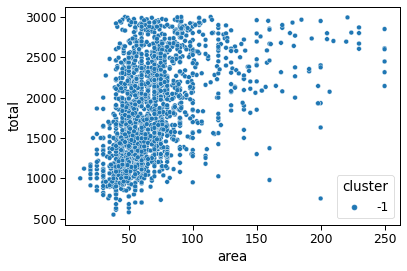

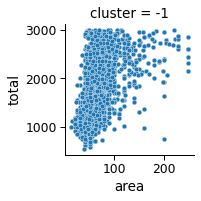

In [116]:
clustering = sklearn.cluster.AffinityPropagation().fit(df[['bathroom','car_space','room','total','area']])
y_spectral = clustering.fit_predict(df[['bathroom','car_space','room','total','area']])
df['cluster'] = y_spectral
sns.scatterplot(x='area', y='total', data=df, hue='cluster',palette='tab10')

g = sns.FacetGrid(df, col='cluster')
g.map(sns.scatterplot,'area','total', palette='tab10')

# Conclusion
We created a resonable linear regression but its probably not the best method for this distribution.
In the clustering, a kmeans clustering with the secondary variables seemed to give the best results, the problems is the interpretability of the result. Its not very clear what each group represent or how its organized.